In [1]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/cleaned_daily_data_df.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head()


First few rows of the DataFrame:


,Date,year,month,day,Symbol,Open,High,Low,Close,Volume,gain_loss,high_vs_prev_day,low_vs_prev_day,volume_vs_prev_day,pct_close_change,pct_volume_change
0,2024-11-12,2024,11,12,AAPL,224.55,225.59,223.36,224.23,40375300.0,0,0,1,0,-0.3953,-15.3322
1,2024-11-11,2024,11,11,AAPL,225.00,225.70,221.50,224.23,41949000.0,0,1,0,1,0.0000,3.8977
2,2024-11-08,2024,11,8,AAPL,227.17,228.66,226.41,226.96,38308700.0,0,1,1,0,1.2175,-8.6779
3,2024-11-07,2024,11,7,AAPL,224.63,227.88,224.57,227.48,42083800.0,1,0,0,1,0.2291,9.8544
4,2024-11-06,2024,11,6,AAPL,222.61,226.07,221.19,222.72,54495200.0,1,0,0,1,-2.0925,29.4921


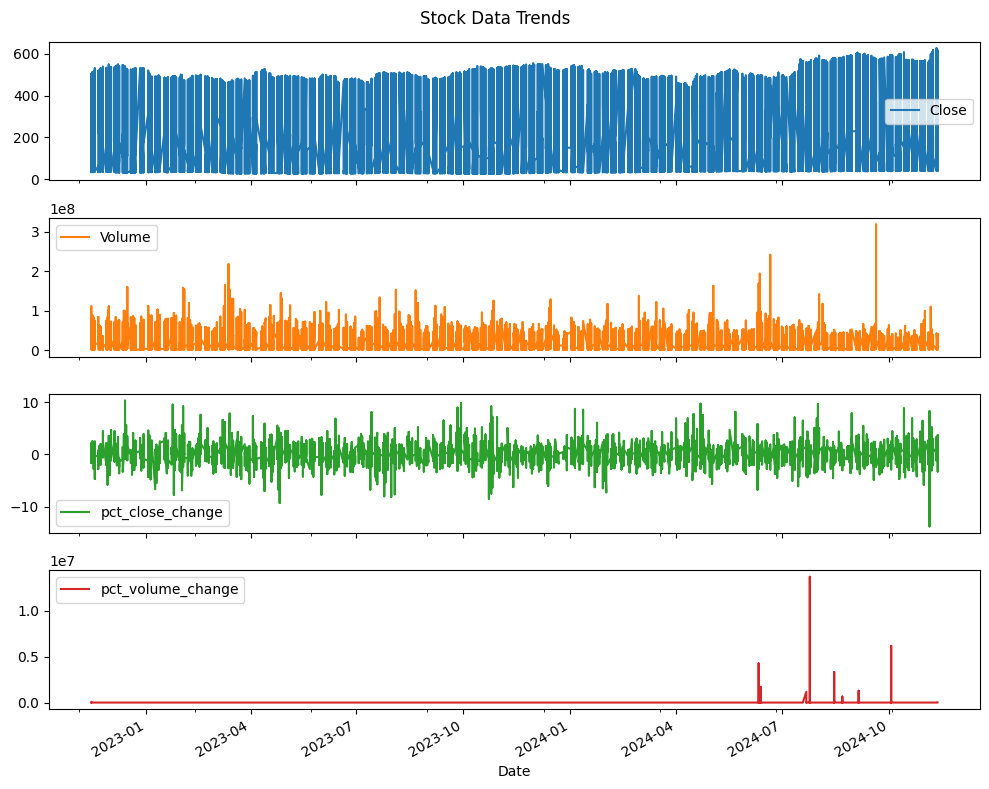

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/cleaned_daily_data_df.csv', parse_dates=['Date'])

# Sorting data by date
df = df.sort_values(by='Date')

# Key specific columns for analysis
key_columns = ['Date', 'Close', 'Volume', 'pct_close_change', 'pct_volume_change']
df[key_columns].set_index('Date').plot(subplots=True, figsize=(10, 8), title="Stock Data Trends")
plt.tight_layout()
plt.show()


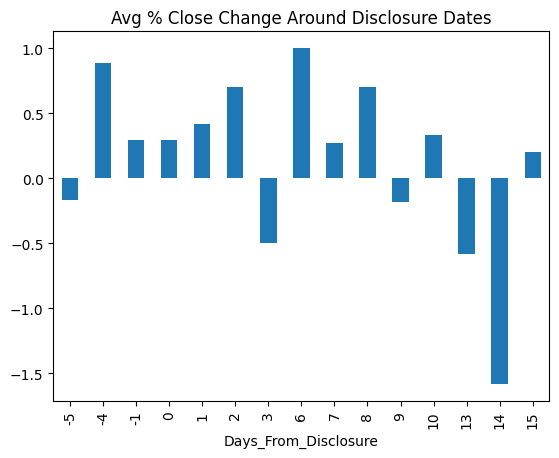

In [3]:
# Define a list of disclosure dates
disclosure_dates = pd.to_datetime(['2024-11-01', '2024-10-29', '2024-10-22'])

# Filter data for 5 days before and after disclosure dates
window = 5
event_data = pd.DataFrame()

for date in disclosure_dates:
    window_data = df[(df['Date'] >= date - pd.Timedelta(days=window)) &
                     (df['Date'] <= date + pd.Timedelta(days=window))]
    event_data = pd.concat([event_data, window_data])

# Plot percentage close change around events
event_data['Days_From_Disclosure'] = (event_data['Date'] - date).dt.days
event_data.groupby('Days_From_Disclosure')['pct_close_change'].mean().plot(kind='bar', title="Avg % Close Change Around Disclosure Dates")
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Use the 'Close' prices for ARIMA modeling
close_prices = df.set_index('Date')['Close']

# Fit an ARIMA model
model = ARIMA(close_prices, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


11022    165.774333
11023    171.472325
11024    192.181146
11025    155.378235
11026    175.843533
11027    181.184002
11028    173.525639
11029    175.210598
11030    175.525742
11031    172.516583
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


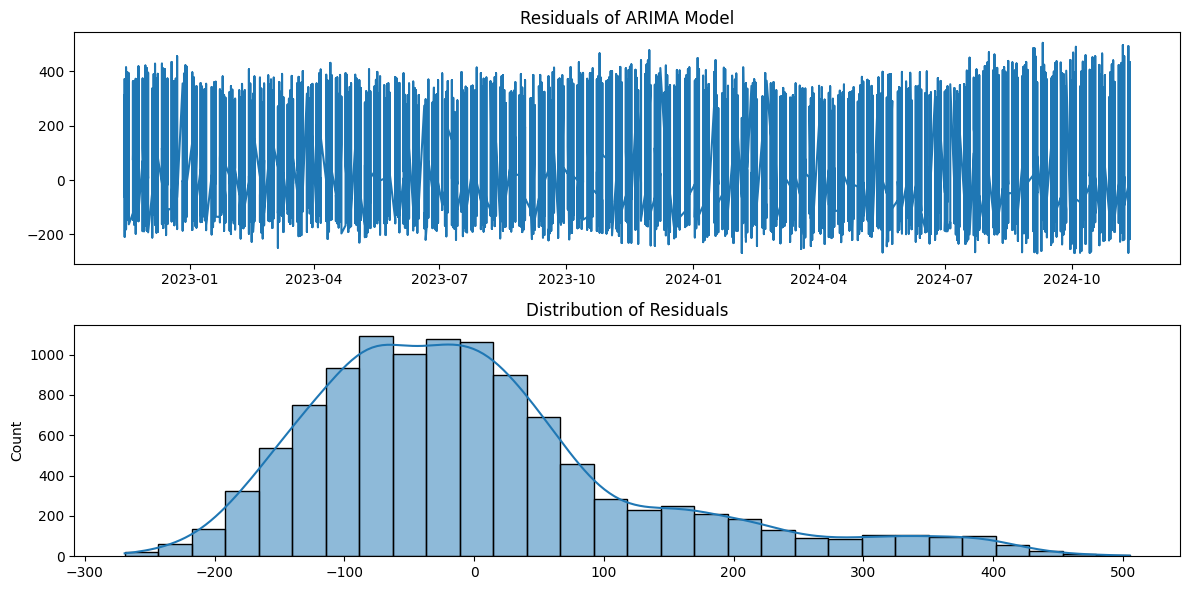

Ljung-Box Test Results:
       lb_stat      lb_pvalue
10  593.937634  3.504153e-121
Residuals are not white noise (p-value < 0.05).


In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns

# Use the 'Close' prices for ARIMA modeling
#close_prices = df.set_index('Date')['Close']

# Fit an ARIMA model (p, d, q)
#model = ARIMA(close_prices, order=(5, 1, 0))  
#model_fit = model.fit()

# Residuals of the ARIMA model
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')

plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# Ljung-Box test for white noise
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].iloc[0] < 0.05:
    print("Residuals are not white noise (p-value < 0.05).")
else:
    print("Residuals are likely white noise (p-value >= 0.05).")


In [6]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/daily_sentiment_df.csv')
print(sentiment_df.columns)

Index(['ticker', 'disclosure_date', 'positive_sentiment', 'neutral_sentiment',
       'negative_sentiment', 'compound_sentiment'],
      dtype='object')


        Date  year  month  day Symbol    Open    High      Low   Close  \
0 2022-11-15  2022     11   15     HD  304.06  316.63  303.250  311.93   
1 2022-11-15  2022     11   15   AMZN  103.21  103.79   97.340   98.94   
2 2022-11-15  2022     11   15     BA  175.49  176.69  172.750  175.35   
3 2022-11-15  2022     11   15    BAC   38.19   38.30   37.295   37.70   
4 2022-11-15  2022     11   15    CAT  237.10  239.40  232.750  234.59   

        Volume  ...  high_vs_prev_day  low_vs_prev_day  volume_vs_prev_day  \
0    9288200.0  ...                 1                0                   1   
1  111336317.0  ...                 1                1                   1   
2    7202200.0  ...                 1                1                   1   
3   46082832.0  ...                 1                1                   1   
4    3371000.0  ...                 1                1                   1   

   pct_close_change  pct_volume_change  ticker positive_sentiment  \
0           -0.94

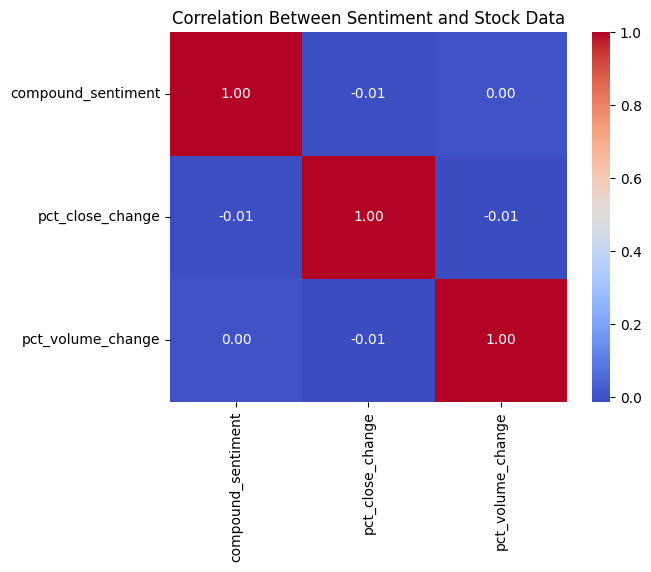

In [7]:
# Load sentiment data without specifying parse_dates
sentiment_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/daily_sentiment_df.csv')

# Rename 'disclosure_date' to 'Date' for consistency
sentiment_df.rename(columns={'disclosure_date': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')

# Merge the sentiment data with stock data on the 'Date' column
merged_df = pd.merge(df, sentiment_df, on='Date', how='inner')

# Check the merged DataFrame
print(merged_df.head())

# Calculate correlation between sentiment score and stock percentage changes
correlation_matrix = merged_df[['compound_sentiment', 'pct_close_change', 'pct_volume_change']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sentiment and Stock Data")
plt.show()


In [8]:

# Merge the sentiment data with stock data on the 'Date' column
merged_df



,Date,year,month,day,Symbol,Open,High,Low,Close,Volume,...,high_vs_prev_day,low_vs_prev_day,volume_vs_prev_day,pct_close_change,pct_volume_change,ticker,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment
0,2022-11-15,2022,11,15,HD,304.06,316.63,303.250,311.93,9288200.0,...,1,0,1,-0.9463,76.9619,HD,0.931103,0.048288,0.020609,0.910494
1,2022-11-15,2022,11,15,AMZN,103.21,103.79,97.340,98.94,111336317.0,...,1,1,1,1.8740,26.5778,HD,0.931103,0.048288,0.020609,0.910494
2,2022-11-15,2022,11,15,BA,175.49,176.69,172.750,175.35,7202200.0,...,1,1,1,1.5403,62.3983,HD,0.931103,0.048288,0.020609,0.910494
3,2022-11-15,2022,11,15,BAC,38.19,38.30,37.295,37.70,46082832.0,...,1,1,1,0.9101,93.5194,HD,0.931103,0.048288,0.020609,0.910494
4,2022-11-15,2022,11,15,CAT,237.10,239.40,232.750,234.59,3371000.0,...,1,1,1,0.9337,10.1022,HD,0.931103,0.048288,0.020609,0.910494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,2024-11-12,2024,11,12,BAC,46.14,46.45,45.840,45.86,38155885.0,...,0,1,1,-0.0218,3.4071,XOM,0.943081,0.037897,0.019022,0.924059
12426,2024-11-12,2024,11,12,BA,148.40,148.50,143.850,145.17,16746650.0,...,1,1,0,3.7151,-21.0518,HD,0.931241,0.047847,0.020911,0.910330
12427,2024-11-12,2024,11,12,BA,148.40,148.50,143.850,145.17,16746650.0,...,1,1,0,3.7151,-21.0518,XOM,0.943081,0.037897,0.019022,0.924059
12428,2024-11-12,2024,11,12,AAPL,224.55,225.59,223.360,224.23,40375300.0,...,0,1,0,-0.3953,-15.3322,HD,0.931241,0.047847,0.020911,0.910330


In [ ]:
# LSTM

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select relevant columns for LSTM 
features = ['Close', 'compound_sentiment']
target = 'Close'  # Predicting the next 'Close' price

# Scale the features for better performance 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[features])

# Define a function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Features up to sequence length
        y.append(data[i+seq_length, -1])    # Target is the next 'Close' value
    return np.array(X), np.array(y)

# Set sequence length 
seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (9920, 30, 1)
Shape of y_train: (9920,)


In [10]:
# Building the LSTM Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    Dropout(0.2),  # Prevent overfitting
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.1128 - val_loss: 0.0062
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0095 - val_loss: 0.0049
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0067 - val_loss: 0.0047
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 9/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 10/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 11/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 12/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


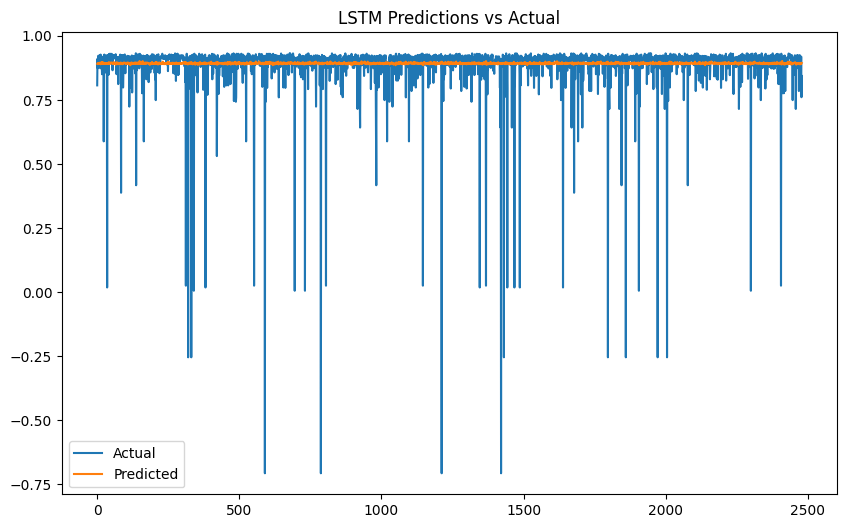

In [11]:
# Evaluate the Model

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and actual values
predictions_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((predictions.shape[0], len(features) - 1)), predictions))
)[:, -1]
y_test_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((y_test.shape[0], len(features) - 1)), y_test.reshape(-1, 1)))
)[:, -1]

# Plot predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(predictions_rescaled, label="Predicted")
plt.legend()
plt.title("LSTM Predictions vs Actual")
plt.show()


In [12]:
# Forecast future prices
future_steps = 10  # Predict the next 10 days
last_sequence = X_test[-1]  # Use the last test sequence
future_predictions = []

for _ in range(future_steps):
    next_prediction = model.predict(last_sequence[np.newaxis, :, :])[0]
    future_predictions.append(next_prediction)

    # Update the sequence with the predicted value
    next_prediction_reshaped = next_prediction.reshape(1, -1)  # Reshape to match the sequence shape
    next_sequence = np.append(last_sequence[1:], next_prediction_reshaped, axis=0)

# Rescale predictions
future_predictions_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((len(future_predictions), len(features) - 1)), future_predictions))
)[:, -1]

print("Future Predictions:", future_predictions_rescaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Future Predictions: [0.89419619 0.89419619 0.89419619 0.89419619 0.89419619 0.89419619
 0.89419619 0.89419619 0.89419619 0.89419619]


In [13]:
print(df.columns)


Index(['Date', 'year', 'month', 'day', 'Symbol', 'Open', 'High', 'Low',
       'Close', 'Volume', 'gain_loss', 'high_vs_prev_day', 'low_vs_prev_day',
       'volume_vs_prev_day', 'pct_close_change', 'pct_volume_change'],
      dtype='object')


In [14]:
print(merged_df.columns)


Index(['Date', 'year', 'month', 'day', 'Symbol', 'Open', 'High', 'Low',
       'Close', 'Volume', 'gain_loss', 'high_vs_prev_day', 'low_vs_prev_day',
       'volume_vs_prev_day', 'pct_close_change', 'pct_volume_change', 'ticker',
       'positive_sentiment', 'neutral_sentiment', 'negative_sentiment',
       'compound_sentiment'],
      dtype='object')


In [15]:
print(sentiment_df.columns)


Index(['ticker', 'Date', 'positive_sentiment', 'neutral_sentiment',
       'negative_sentiment', 'compound_sentiment'],
      dtype='object')
